# The Uncalibrated Spectrum of Ba133

** **

 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following lines to install lmfit

#from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])
#call(['pip', 'install', 'ipympl'])

In [75]:
#import libraries
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit.models import GaussianModel, MoffatModel, StudentsTModel
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import matplotlib.lines as mlines
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


## Data Wrangling

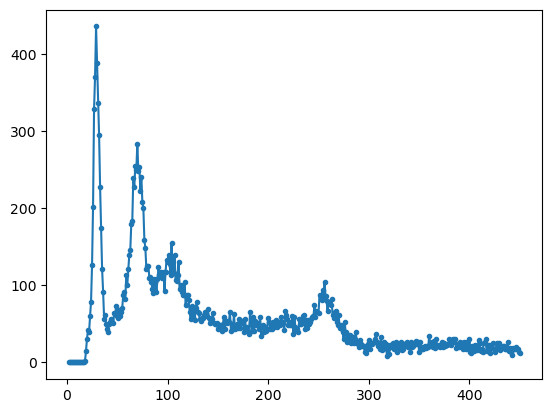

In [3]:
#Uncomment the next line to make the graph interactive
#%matplotlib widget

# Load the data
df = pd.read_csv("./Data/Ba133_vs_channel.csv", sep=" ")
df.rename(columns={"1": "Channel", "0": "Counts"}, inplace=True)

df = df[df['Channel'] <= 450]

#preview the spectrum
plt.plot('Channel', 'Counts', data = df, marker = ".")

plt.show()

In [4]:
# Define the channel ranges
channel_ranges = [0, 40, 52, 85, 97, 150, 192, 230, 295, 450]

# Create labels for the ranges
labels = [f"Range {i}-{j}" for i, j in zip(channel_ranges[:-1], channel_ranges[1:])]

# Use pd.cut() to categorize the data into the specified ranges
df['Channel Range'] = pd.cut(df['Channel'], bins=channel_ranges, labels=labels, include_lowest=True)

# Create a dictionary of DataFrames, one for each channel range
channel_range_dfs = {label: group for label, group in df.groupby('Channel Range')}

# Access individual DataFrames using keys (e.g., channel_range_dfs['Range 0-40'])
channel_range_dfs['Range 40-52'].head()

,Channel,Counts,Channel Range
39,41,40,Range 40-52
40,42,50,Range 40-52
41,43,52,Range 40-52
42,44,57,Range 40-52
43,45,52,Range 40-52


## Define the composite model, fit, and print the results

In [206]:
#use builtin NameModel, specify prefix for each:
mod1 = MoffatModel(prefix='g1_')
mod2 = MoffatModel(prefix='g2_') 
mod3 = MoffatModel(prefix='g3_')
mod4 = MoffatModel(prefix='g4_') 
mod5 = MoffatModel(prefix='g5_')

mod8 = MoffatModel(prefix='g8_')


In [207]:
#initialize the parameters to be optimized
pars1  = mod1.make_params(g1_amplitude=440.0, g1_center=29.6, g1_sigma=6.7, g1_beta=1)
pars2  = mod2.make_params(g2_amplitude=76.0, g2_center=48.2, g2_sigma=1.83, g2_beta=1)                         
pars3  = mod3.make_params(g3_amplitude=284.5, g3_center=69.7, g3_sigma=5.34, g3_beta=1)
pars4  = mod4.make_params(g4_amplitude=125.0, g4_center=91.5, g4_sigma=1.83, g4_beta=1)
pars5  = mod5.make_params(g5_amplitude=156.0, g5_center=104.0, g5_sigma=8.7)

pars8  = mod8.make_params(g8_amplitude=105.0, g8_center=256.0, g8_sigma=10.7, g8_beta=1)

In [248]:
#fit with weights=1./yerr
result1 = mod1.fit(channel_range_dfs['Range 0-40']['Counts'], pars1, x = channel_range_dfs['Range 0-40']['Channel'], weights = 1 / (np.std(channel_range_dfs['Range 0-40']["Channel"]) + (channel_range_dfs['Range 0-40']["Channel"] * 0.155)))
result2 = mod2.fit(channel_range_dfs['Range 40-52']['Counts'], pars2, x = channel_range_dfs['Range 40-52']['Channel'], weights = 1 / (np.std(channel_range_dfs['Range 40-52']["Channel"]) + (channel_range_dfs['Range 40-52']["Channel"] * 0.053)))
result3 = mod3.fit(channel_range_dfs['Range 52-85']['Counts'], pars3, x = channel_range_dfs['Range 52-85']['Channel'], weights = 1 / (np.std(channel_range_dfs['Range 52-85']["Channel"]) + (channel_range_dfs['Range 52-85']["Channel"] * 0.045)))
result4 = mod4.fit(channel_range_dfs['Range 85-97']['Counts'], pars4, x = channel_range_dfs['Range 85-97']['Channel'], weights = 1 / (np.std(channel_range_dfs['Range 85-97']["Channel"]) + (channel_range_dfs['Range 85-97']["Channel"] * 0.0635)))
result5 = mod5.fit(channel_range_dfs['Range 97-150']['Counts'], pars5, x = channel_range_dfs['Range 97-150']['Channel'], weights = 1 / (channel_range_dfs['Range 97-150']["Channel"] * 0.0852))

result8 = mod8.fit(channel_range_dfs['Range 230-295']['Counts'], pars8, x = channel_range_dfs['Range 230-295']['Channel'], weights = 1 / (channel_range_dfs['Range 230-295']["Channel"] * 0.0314))

In [249]:
#print the Fit Statistics and parameters
print()
print(result1.fit_report())
print()
print(result2.fit_report())
print()
print(result3.fit_report())
print()
print(result4.fit_report())
print()
print(result5.fit_report())
print()
print(result8.fit_report())
print()


[[Model]]
    Model(moffat, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 39
    # variables        = 4
    chi-square         = 35.0014610
    reduced chi-square = 1.00004174
    Akaike info crit   = 3.78129814
    Bayesian info crit = 10.4355447
    R-squared          = 0.99994586
[[Variables]]
    g1_amplitude:  417.288970 +/- 9.63426608 (2.31%) (init = 440)
    g1_center:     29.5492150 +/- 0.07637184 (0.26%) (init = 29.6)
    g1_sigma:      6.13926325 +/- 0.96420036 (15.71%) (init = 6.7)
    g1_beta:       2.29972837 +/- 0.52340427 (22.76%) (init = 1)
    g1_fwhm:       7.28226622 +/- 0.25645404 (3.52%) == '2*g1_sigma*sqrt(2**(1.0/max(1e-3, g1_beta))-1)'
    g1_height:     417.288970 +/- 9.63426606 (2.31%) == 'g1_amplitude'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_sigma, g1_beta)      = +0.9854
    C(g1_amplitude, g1_sigma) = -0.5150
    C(g1_amplitude, g1_beta)  = -0.4231

[[Model]]
 

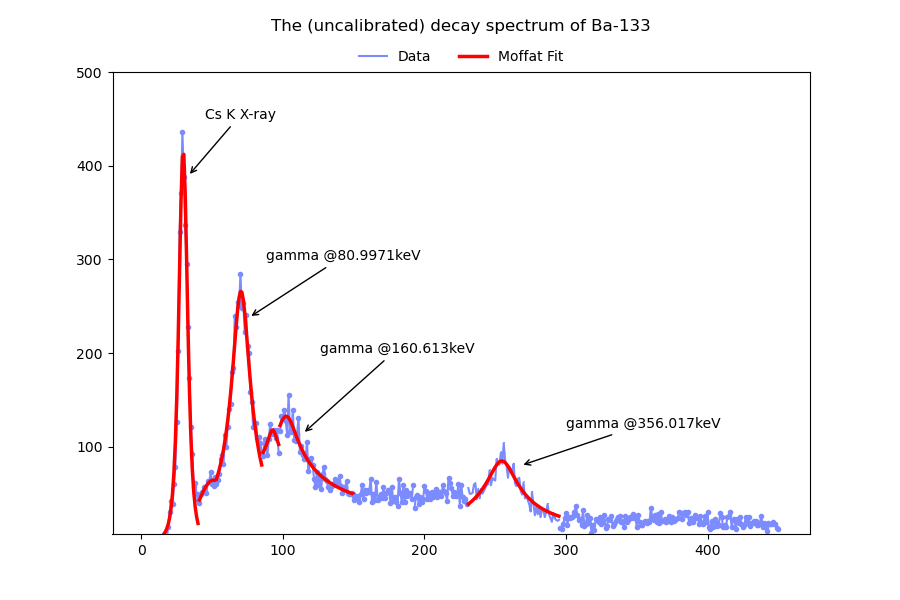

In [250]:
#Uncomment the next line to make the plot interactive
#%matplotlib widget

plt.figure(figsize=(9,6))

#plot data and models
plt.plot('Channel', 'Counts', data =  channel_range_dfs['Range 0-40'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 0-40']['Channel'], result1.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 40-52'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 40-52']['Channel'], result2.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 52-85'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 52-85']['Channel'], result3.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 85-97'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 85-97']['Channel'], result4.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 97-150'], color = '#7c8bfd', marker = ".")
plt.plot(channel_range_dfs['Range 97-150']['Channel'], result5.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 150-192'], color = '#7c8bfd', marker = ".")

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 192-230'], color = '#7c8bfd', marker = ".")

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 230-295'], color = '#7c8bfd', marker = ",")
plt.plot(channel_range_dfs['Range 230-295']['Channel'], result8.best_fit, 'r-', linewidth=2.5)

plt.plot('Channel', 'Counts', data = channel_range_dfs['Range 295-450'], color = '#7c8bfd', marker = ".")


plt.title('The (uncalibrated) decay spectrum of Ba-133', y = 1.07)

plt.ylim(7, 500) 

#uncomment the line bellow to activate the semilog scale
#plt.yscale('log')

#make annotations
plt.annotate('Cs K X-ray', xy=(33, 389), xytext=(45, 450),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

plt.annotate('gamma @80.9971keV', xy=(76, 238), xytext=(88, 299),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

plt.annotate('gamma @160.613keV', xy=(114, 114), xytext=(126, 200),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

plt.annotate('gamma @356.017keV', xy=(268, 80), xytext=(300, 120),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"),
            )

# Create legend entries for the blue and red lines (data and model) and display the legend
blue_line = mlines.Line2D([], [], color='#7c8bfd', label='Data')

red_line = mlines.Line2D([], [], color='red', label='Moffat Fit', linewidth=2.5)

plt.legend([blue_line, red_line], ['Data', 'Moffat Fit'], loc='lower center', bbox_to_anchor= (0.5, 1.005), ncol=2,
            borderaxespad=0, frameon=False)


#show the plot
plt.show()





---

## References

### **The images below are included as a reference for the decay scheme and gamma ray energies** 

![](./img/Ba_spectrum.png)

https://gammaray.inl.gov/SiteAssets/catalogs/nai/pdf/ba133.pdf


![](./img/Ba_gamma.png)

https://gammaray.inl.gov/SiteAssets/catalogs/nai/pdf/ba133.pdf


![](./img/Ba_energy_table.png)


https://nucleardata.nuclear.lu.se/toi/nuclide.asp?iZA=560133

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>